# Importing requried Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading data
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
#checking the shape of data
df.shape

(200, 5)

data have 200 rows and 5 columns 

sales is target column

here is regression problem


In [8]:
#checking datatype
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

all acolumns have numeric datatype

In [9]:
#checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


we can see that there is no null value and Unnamed column is a kind of index xol we can drop in

In [10]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

no null value present in dataset

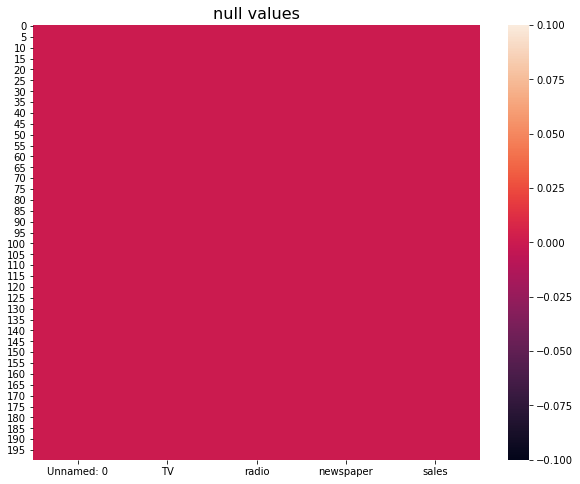

In [12]:
# plotting heatmap for double check null values

plt.figure(figsize=(10,8))
plt.title("null values",fontsize=16)
sns.heatmap(df.isnull());

No null  value in dataset

#stats summary

In [13]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


1- Our dataset seems to be normally distributed because mean and median values are nearly close to each other.

2-There could be some outliers present in newspaper column because there is a compartively high difference between 3rd quantile and max values.

3- Radio attribute has a minimum zero value in our dataset which could be part of further investigation in our dataset.

# correlation 

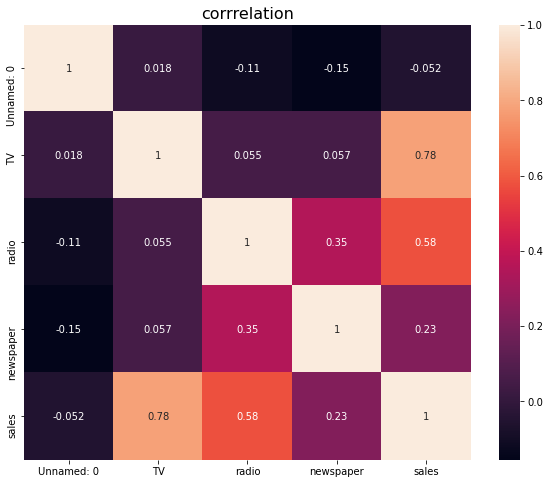

In [15]:
plt.figure(figsize=(10,8))
plt.title("corrrelation",fontsize=16)
sns.heatmap(df.corr(),annot=True);

In [17]:
#checking correlation with target column
df.corr()['sales'].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

TV and radio has a strong and positive correlation with targer attribute.

Newspaper and radio are correlated to each other.

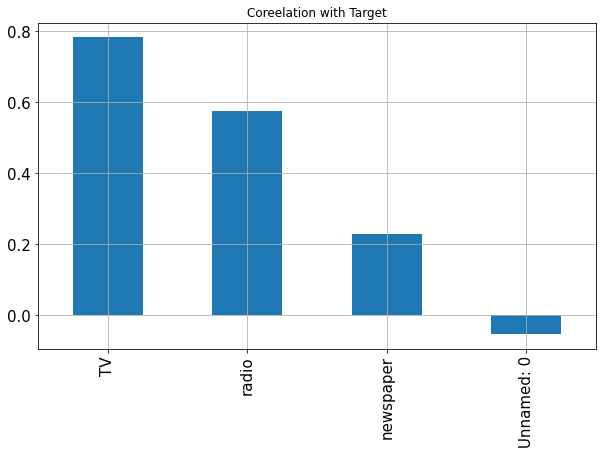

In [18]:
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=15);

TV, Radio have correlation more that 50% with target variable.

# Data analysis and visualization

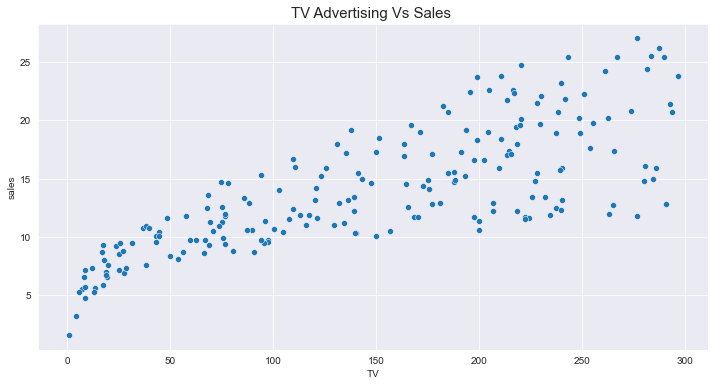

In [20]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('TV Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['TV'],df['sales'],data=df)
plt.show();

1- There is a linear positive correlation between TV advertising and Sales.

2- As Tv advertising inceases sales also increases.

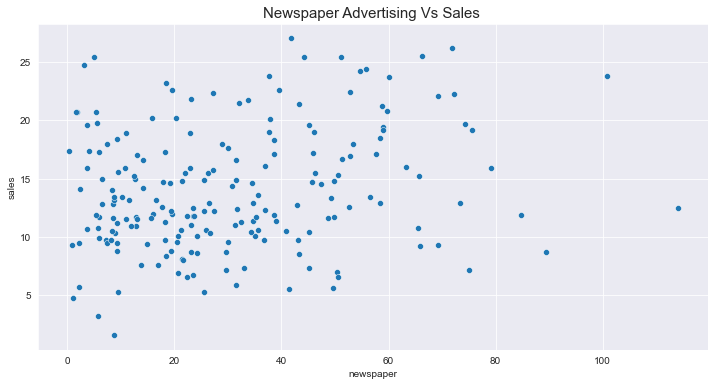

In [21]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Newspaper Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['newspaper'],df['sales'],data=df)
plt.show();

1- from above scatter plot we can see that there is a moderate realtionship with sales.

2- Datapoints are scattered we can't conclude from this plot

3-Some points are widly scattered.

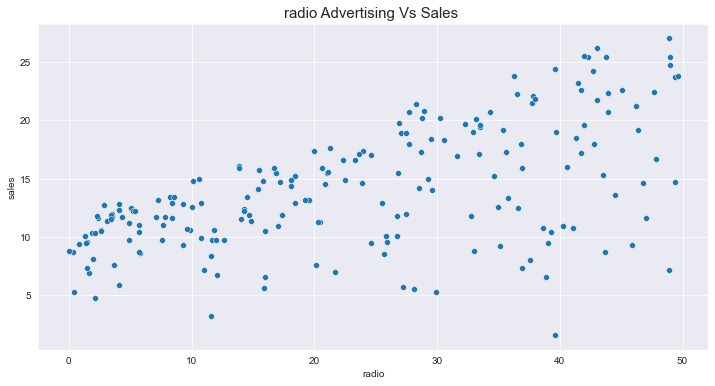

In [22]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('radio Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['radio'],df['sales'],data=df)
plt.show();

1- This plot shows a positive linear relation between radio advertising and sales.

2- As radio advertising increases, sales also get increases.

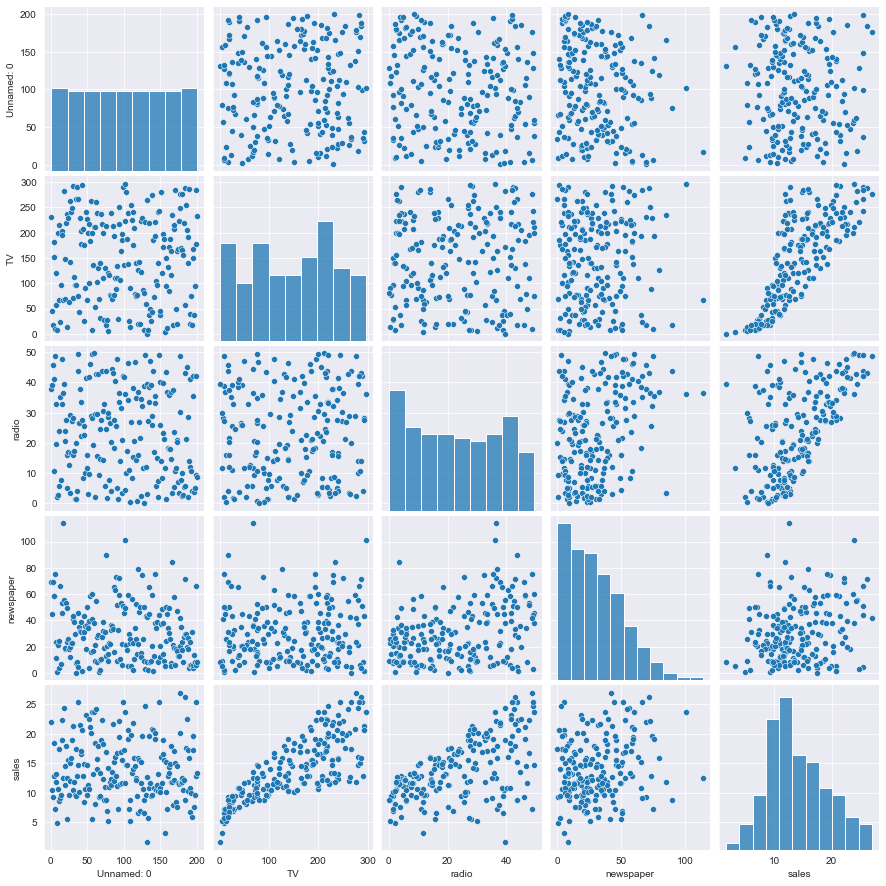

In [23]:
# pairplot for whole df
sns.pairplot(df);

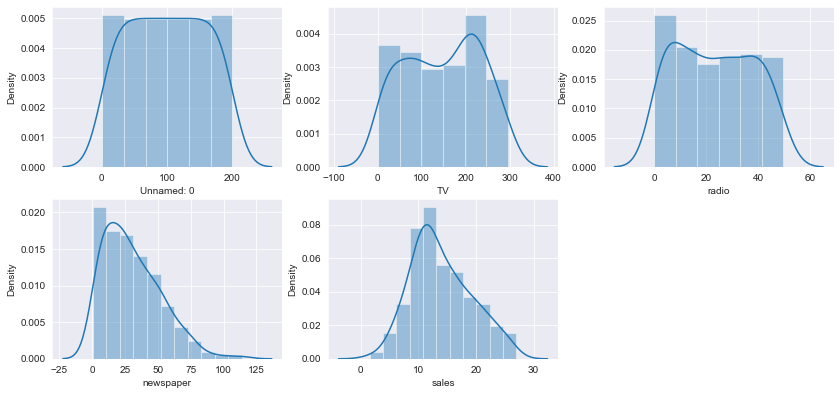

In [24]:
# data distribution
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();

1- It shows that our dataset is approimately bell shaped in distribution means normally distributed.

2- Newspaper attribute is a little right skewed.

3- our target attribute is Normally distributed.

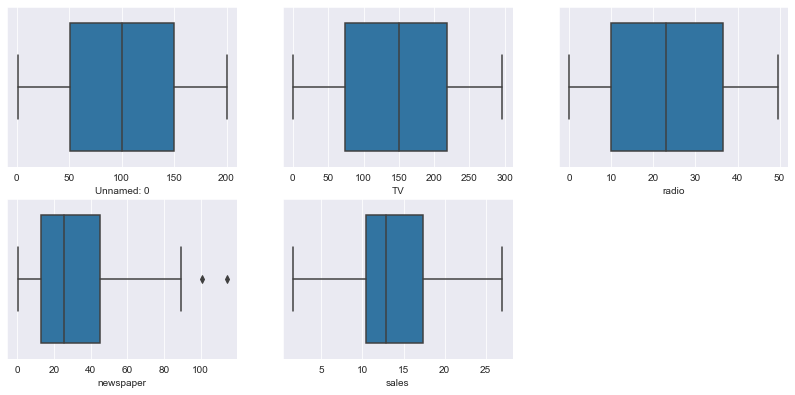

In [25]:
# checking outliers

plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show(); 

newspaper have outliers

In [26]:
def outlier_normally(df,col):
    lower_boundary=df[col].mean()-3*df[col].std()
    upper_boundary=df[col].mean()+3*df[col].std()
    print(lower_boundary,upper_boundary)
    df[col]=np.where((df[col]<lower_boundary)|(df[col]>upper_boundary),df[col].median(),df[col])
    sns.boxplot(df[col])

-34.7818625155685 95.8898625155685


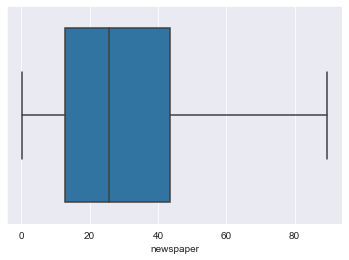

In [27]:
outlier_normally(df,'newspaper')

 replaced the outliers with median , now there is no outliers present in dataset

# skewness

In [28]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.658874
sales         0.407571
dtype: float64

Newspaper column skewness is more than .5 so we will remove this

In [29]:
df['newspaper'] = np.sqrt(df['newspaper'])

In [30]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -0.040656
sales         0.407571
dtype: float64

skewness is completly removed from dataset

# time to split data into train test

In [31]:
x=df.drop(['Unnamed: 0','sales'],axis=1)  ## We have drop unnamed :0 because this attribute has no significance for predicting sales.
y=df[['sales']]

In [32]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [33]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


# Data Standardization

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
ss = StandardScaler()
x_scaled = ss.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)
x

,TV,radio,newspaper
0,0.969852,0.981522,1.645000
1,-1.197376,1.082808,0.829028
2,-1.516155,1.528463,1.648059
3,0.052050,1.217855,1.303888
4,0.394182,-0.841614,1.300559
...,...,...,...
195,-1.270941,-1.321031,-0.698474
196,-0.617035,-1.240003,-1.140710
197,0.349810,-0.942899,-1.301679
198,1.594565,1.265121,1.552196


# feature importance

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [37]:
print(extra.feature_importances_)

[0.61418651 0.3778929  0.00792059]


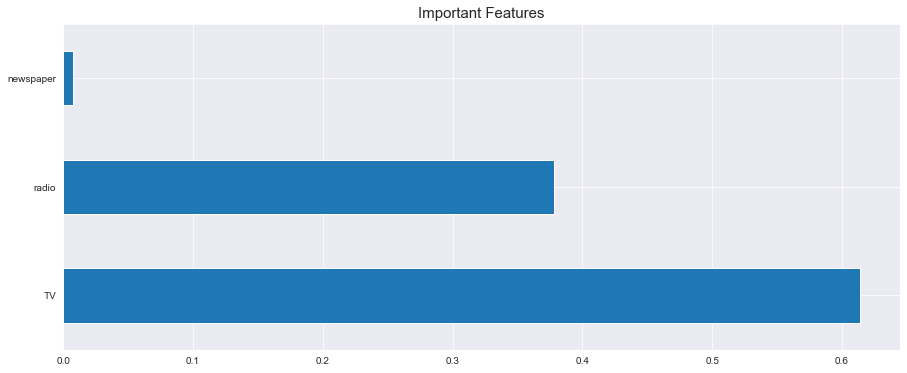

In [38]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show();

 radio and TV are highly important features for our target column to predict the right sales price

# model building

In [90]:
#Importing model building Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [69]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r

# Linerar regression

In [70]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 92 is 95.15375445674434
cross validation score 88.74289458669635
Standard Deviation 3.9909298543300933
Training accuracy 89.0810705879388
Test Accuracy 91.88727395820789
MAE 1.1592043558674565
MSE 2.079624306279034
RMSE 1.4420902559406723


92

# lasso regression

In [71]:
lasso = Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 83 is 86.16707145490253
cross validation score 81.75135660884789
Standard Deviation 4.816955790793653
Training accuracy 82.07247509119465
Test Accuracy 84.07357569037717
MAE 1.497544780461144
MSE 4.082595533953026
RMSE 2.020543375914763


83

# ridge regression

In [59]:
ridge = Ridge()
maxr2_score(ridge,x,y)

max r2 score corresponding to 92 is 95.125522506385
cross validation score 88.74948915182891
Standard Deviation 0.04033574508512031
Training accuracy 89.07790915823749
Test Accuracy 91.86462100001408
MAE 1.1632500944990778
MSE 2.085431188235391
RMSE 1.4441022083756367


92

# decision tree regressor

In [60]:
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 75 is 97.92392845681569
cross validation score 94.67821616897555
Standard Deviation 0.006108800211810518
Training accuracy 100.0
Test Accuracy 93.44622982667619
MAE 0.9199999999999997
MSE 1.6799999999999997
RMSE 1.296148139681572


75

# Knn regressor

In [61]:
knn = KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 61 is 96.39487545207585
cross validation score 93.30030376371383
Standard Deviation 0.03059765905442555
Training accuracy 95.13356956500039
Test Accuracy 92.3427387737428
MAE 0.8995000000000003
MSE 1.9628699999999994
RMSE 1.4010246250512512


61

# support vector regressor

In [62]:
svr =SVR()
maxr2_score(svr,x,y)

max r2 score corresponding to 45 is 97.63358231098597
cross validation score 90.45732839730547
Standard Deviation 0.055209774393147254
Training accuracy 92.7292439264263
Test Accuracy 91.46031876225645
MAE 0.8671469648057638
MSE 2.189070428164418
RMSE 1.4795507521421556


45

# radom forest regressor

In [63]:
rfg = RandomForestRegressor()
maxr2_score(rfg,x,y)

max r2 score corresponding to 47 is 98.89162961210396
cross validation score 97.64705875091408
Standard Deviation 0.00870356402511751
Training accuracy 99.630172766677
Test Accuracy 98.36266447817555
MAE 0.5066750000000024
MSE 0.41971622500000283
RMSE 0.6478550956811274


47

In [88]:
model_df= pd.DataFrame({'Model':['Linerar regression','Lasso','Ridge','Decision Tree','KNN','SVM','Random forest'],
                       'MaxR2 score':[95.15,86.16,95.12,97.92,96.39,97.63,98.89],
                       'Cross validation':[88.74,81.75,88.74,94.67,93.30,90.45,97.64]})

In [89]:
model_df

,Model,MaxR2 score,Cross validation
0,Linerar regression,95.15,88.74
1,Lasso,86.16,81.75
2,Ridge,95.12,88.74
3,Decision Tree,97.92,94.67
4,KNN,96.39,93.30
5,SVM,97.63,90.45
6,Random forest,98.89,97.64


# Hyperparameter Tuning for random forest

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_


{'bootstrap': True, 'max_depth': 50, 'max_features': 3, 'n_estimators': 100}

 Mean Absolute Error (MAE) : 0.4852249999999991
Mean Squared Error (MSE) : 0.3970443249999982
Root Mean Squared Error : 0.6301145332397898
R_2 score: 98.59244476507945


<AxesSubplot:ylabel='sales'>

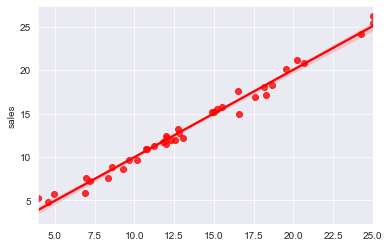

In [83]:
forest=RandomForestRegressor(bootstrap=True,max_depth=50,max_features=3,n_estimators=100)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test)))
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

 Hyperparameter tuning our R_2 score is 98.59 which is almost same without param tuning we will save this as our best Model.

# saving model


In [85]:
import joblib
joblib.dump(forest,'advertiseforest.pkl')

['advertiseforest.pkl']

In [86]:
# loading model
loaded_model=joblib.load('advertiseforest.pkl')
prediction=loaded_model.predict(x_test)

In [87]:
prediction

array([15.016, 12.304, 12.574,  3.977, 18.294,  9.689, 12.812,  4.965,
        6.898, 20.647,  8.596, 12.006, 10.194,  4.608, 11.798, 18.144,
       16.515, 16.558, 25.018,  8.356, 19.549, 11.263, 14.882, 11.918,
       24.261, 10.712, 12.753, 15.213, 18.663, 12.02 ,  7.243,  9.301,
       10.785, 24.986, 13.063,  6.962, 20.241, 17.589, 12.056, 15.542])

# Mission complete 

# "you can have data without informationbut you cannot have information without data"